In [1]:
# Importando as bibliotecas essenciais para a análise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurando o estilo dos gráficos que faremos a seguir
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Construindo o caminho para o arquivo de dados
# O '..' significa "voltar uma pasta" (de 'notebooks' para a raiz do projeto)
caminho_dados = os.path.join('data', 'sods.csv')

# Carregando o dataset
try:
    df = pd.read_csv(caminho_dados)
    print("Dataset carregado com sucesso!")
    
    # Exibindo as primeiras 5 linhas para ter uma visão geral dos dados
    print("\n--- Primeiras 5 linhas do dataset ---")
    display(df.head())
    
    # Exibindo um resumo técnico do dataset (tipos de coluna, valores não nulos)
    print("\n--- Informações gerais do dataset ---")
    df.info()
except FileNotFoundError:
    print(f"Erro: O arquivo não foi encontrado em '{caminho_dados}'")
    print("Por favor, verifique se o nome do arquivo está correto e se ele está na pasta 'dados'.")


Dataset carregado com sucesso!

--- Primeiras 5 linhas do dataset ---


,idade,genero,etnia,pcd,vive_no_brasil,estado_moradia,nivel_ensino,formacao,tempo_experiencia_dados,linguagens_preferidas,bancos_de_dados,cloud_preferida,cargo
0,39.0,Masculino,Parda,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 1 a 2 anos,R,"PostgreSQL, Oracle, MySQL, SQL SERVER",Amazon Web Services (AWS),DBA/Administrador de Banco de Dados
1,32.0,Masculino,Parda,Não,True,Pará (PA),Graduação/Bacharelado,Outras Engenharias,de 3 a 4 anos,NaN,NaN,NaN,NaN
2,53.0,Masculino,Branca,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Python,"PostgreSQL, MySQL, Oracle, DB2",Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...
3,27.0,Masculino,Branca,Não,True,Minas Gerais (MG),Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,de 4 a 6 anos,Python,Google BigQuery,Não sei opinar,Cientista de Dados/Data Scientist
4,46.0,Feminino,Branca,Não,True,Pará (PA),Pós-graduação,Computação / Engenharia de Software / Sistemas...,Não tenho experiência na área de dados,Python,Microsoft Access,Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...



--- Informações gerais do dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    4197 non-null   float64
 1   genero                   4262 non-null   object 
 2   etnia                    4271 non-null   object 
 3   pcd                      4271 non-null   object 
 4   vive_no_brasil           4271 non-null   bool   
 5   estado_moradia           4156 non-null   object 
 6   nivel_ensino             4271 non-null   object 
 7   formacao                 4149 non-null   object 
 8   tempo_experiencia_dados  3694 non-null   object 
 9   linguagens_preferidas    2979 non-null   object 
 10  bancos_de_dados          2978 non-null   object 
 11  cloud_preferida          2981 non-null   object 
 12  cargo                    2981 non-null   object 
dtypes: bool(1), float64(1), object(11)
memo

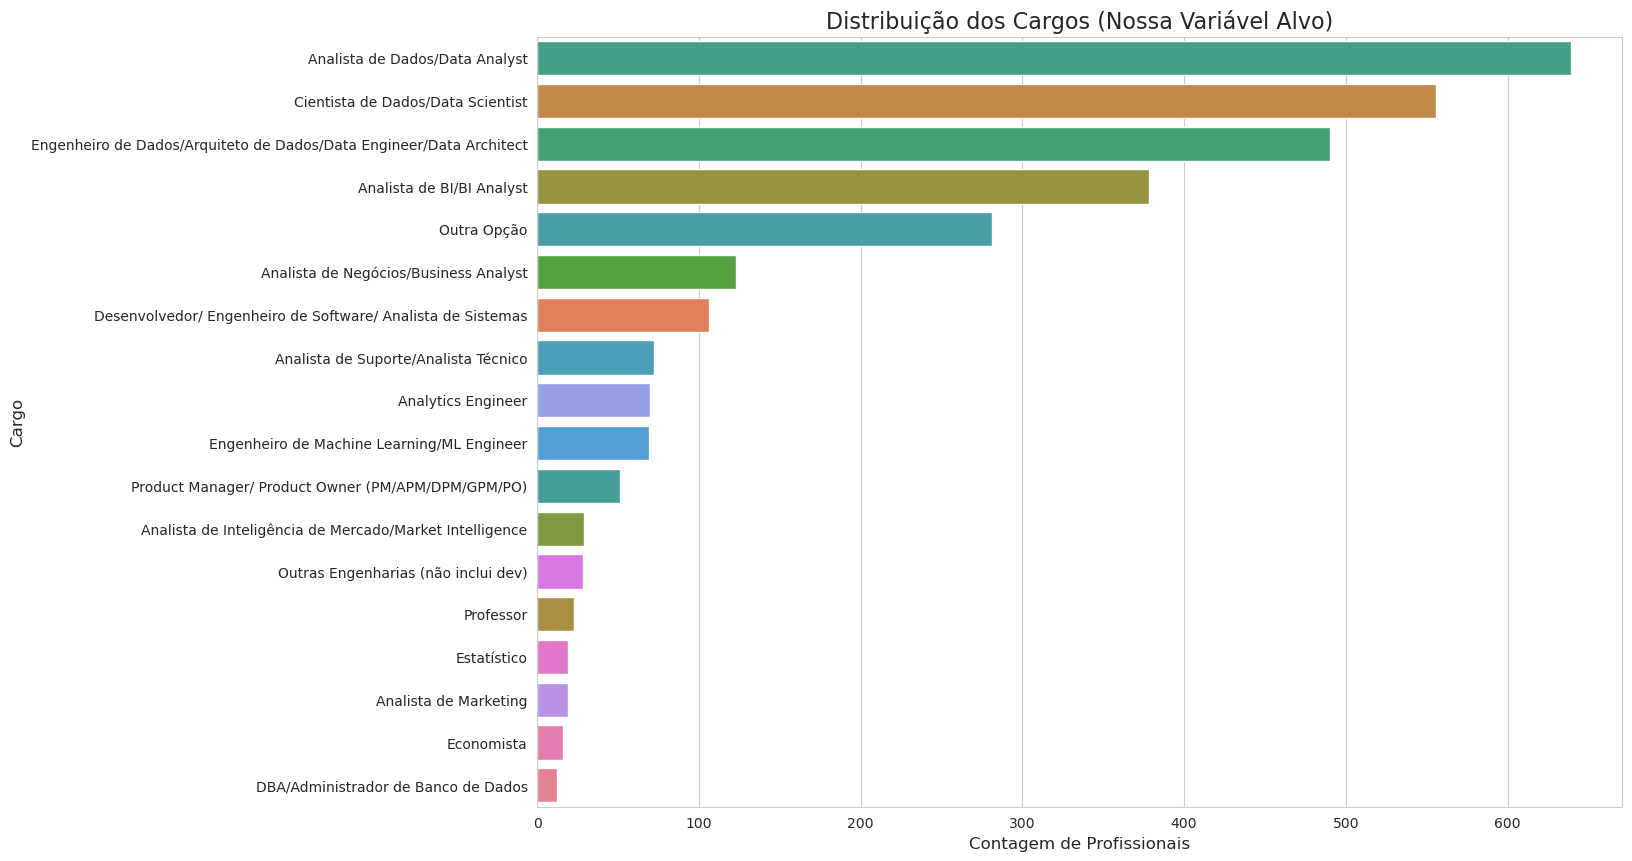

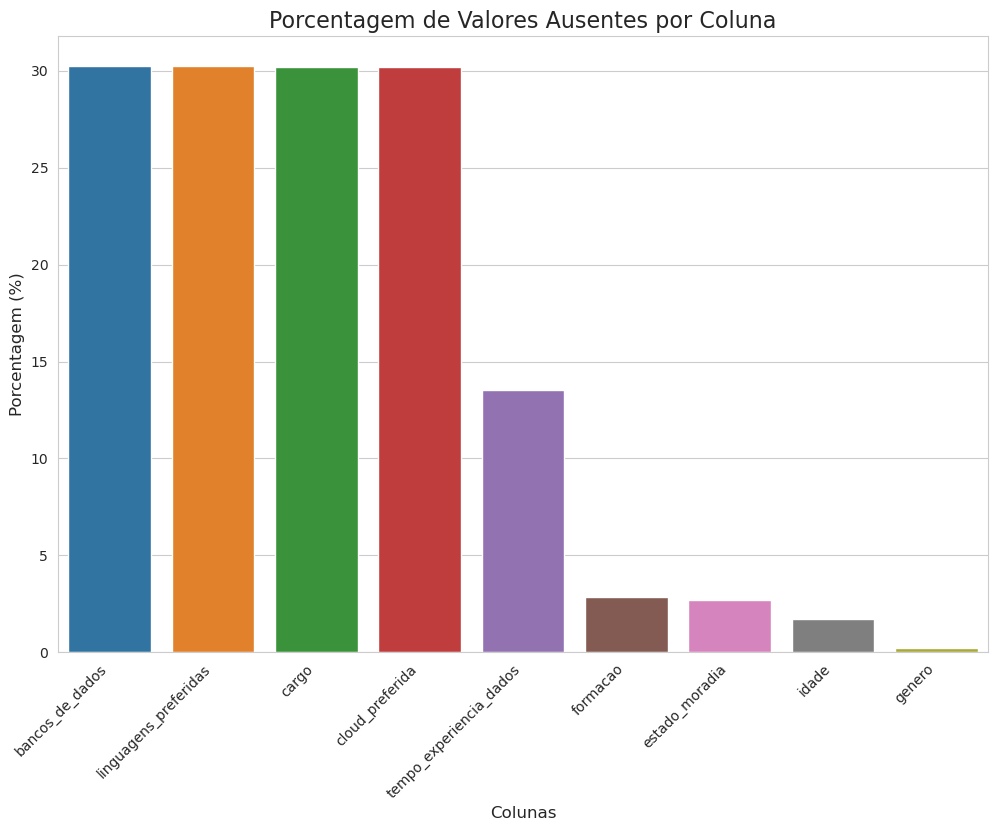

In [2]:
# --- Análise da Variável Alvo (cargo) ---
# Vamos ver quantos profissionais de cada cargo existem no dataset.
# Isso é crucial para saber se as classes estão desbalanceadas.

plt.figure(figsize=(14, 10))
sns.countplot(y=df['cargo'], order=df['cargo'].value_counts().index, hue=df['cargo'], legend=False)
plt.title('Distribuição dos Cargos (Nossa Variável Alvo)', fontsize=16)
plt.xlabel('Contagem de Profissionais', fontsize=12)
plt.ylabel('Cargo', fontsize=12)
plt.show()


# --- Visualização dos Valores Ausentes ---
# O df.info() nos deu os números, mas um gráfico torna o problema mais evidente.

# Calcula a porcentagem de valores ausentes por coluna
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / len(df)) * 100
missing_percentage.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, hue=missing_percentage.index, legend=False)
plt.title('Porcentagem de Valores Ausentes por Coluna', fontsize=16)
plt.xlabel('Colunas', fontsize=12)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Gira os nomes das colunas para não sobrepor
plt.show()

In [3]:
# Fazendo uma cópia do DataFrame original para não alterá-lo.
# É uma boa prática para poder comparar o antes e o depois.
df_processado = df.copy()

# Verificando o número de linhas antes da limpeza
print(f"Número de linhas antes da limpeza: {len(df_processado)}")

# Removendo as linhas onde a coluna 'cargo' é nula
df_processado.dropna(subset=['cargo'], inplace=True)

# Verificando o número de linhas após a limpeza
print(f"Número de linhas após a limpeza da coluna 'cargo': {len(df_processado)}")

# Verificando novamente os valores ausentes para ver o impacto
print("\n--- Valores ausentes restantes ---")
display(df_processado.isnull().sum())

Número de linhas antes da limpeza: 4271
Número de linhas após a limpeza da coluna 'cargo': 2981

--- Valores ausentes restantes ---


idade                      38
genero                      6
etnia                       0
pcd                         0
vive_no_brasil              0
estado_moradia             72
nivel_ensino                0
formacao                   74
tempo_experiencia_dados     0
linguagens_preferidas       2
bancos_de_dados             3
cloud_preferida             0
cargo                       0
dtype: int64

In [4]:
# --- Tratando todos os valores ausentes restantes (versão corrigida sem warnings) ---

# Preenchendo colunas de preferência com 'Nao informado'
colunas_preferencia = ['linguagens_preferidas', 'bancos_de_dados', 'cloud_preferida']
for coluna in colunas_preferencia:
    # A forma corrigida é reatribuir o resultado à coluna
    df_processado[coluna] = df_processado[coluna].fillna('Nao informado')

print("Valores ausentes em colunas de preferência foram preenchidos.")

# Preenchendo 'idade' com a mediana
mediana_idade = df_processado['idade'].median()
df_processado['idade'] = df_processado['idade'].fillna(mediana_idade) # Forma corrigida
print(f"Valores ausentes em 'idade' foram preenchidos com a mediana: {mediana_idade}")

# Preenchendo as colunas categóricas restantes com a moda
colunas_categoricas = ['genero', 'estado_moradia', 'formacao', 'tempo_experiencia_dados']
for coluna in colunas_categoricas:
    moda = df_processado[coluna].mode()[0]
    df_processado[coluna] = df_processado[coluna].fillna(moda) # Forma corrigida
    print(f"Valores ausentes em '{coluna}' foram preenchidos com a moda: '{moda}'")

# Verificação final: somar todos os valores nulos do dataframe. O resultado deve ser 0.
print("\n--- Verificação Final ---")
total_nulos = df_processado.isnull().sum().sum()
print(f"Total de valores ausentes restantes no dataset: {total_nulos}")

if total_nulos == 0:
    print("\nParabéns! Todos os valores ausentes foram tratados com sucesso.")
else:
    print("\nAtenção: Ainda existem valores ausentes para tratar.")

Valores ausentes em colunas de preferência foram preenchidos.
Valores ausentes em 'idade' foram preenchidos com a mediana: 29.0
Valores ausentes em 'genero' foram preenchidos com a moda: 'Masculino'
Valores ausentes em 'estado_moradia' foram preenchidos com a moda: 'São Paulo (SP)'
Valores ausentes em 'formacao' foram preenchidos com a moda: 'Computação / Engenharia de Software / Sistemas de Informação/ TI'
Valores ausentes em 'tempo_experiencia_dados' foram preenchidos com a moda: 'de 1 a 2 anos'

--- Verificação Final ---
Total de valores ausentes restantes no dataset: 0

Parabéns! Todos os valores ausentes foram tratados com sucesso.


In [5]:
# --- Transformando 'tempo_experiencia_dados' em uma variável numérica ordinal ---

# Criando um dicionário que mapeia a ordem da experiência para números
mapa_experiencia = {
    'Não tenho experiência na área de dados': 0,
    'Menos de 1 ano': 1,
    'de 1 a 2 anos': 2,
    'de 3 a 4 anos': 3,
    'de 4 a 6 anos': 4,
    'de 7 a 10 anos': 5,
    'Mais de 10 anos': 6
}

# Criando uma nova coluna 'experiencia_ordinal' com os valores numéricos
df_processado['experiencia_ordinal'] = df_processado['tempo_experiencia_dados'].map(mapa_experiencia)

# Também vamos converter a coluna 'idade' de float (ex: 29.0) para inteiro (ex: 29)
df_processado['idade'] = df_processado['idade'].astype(int)


# --- Verificando a transformação ---
# Exibindo as colunas original e a nova, lado a lado, para confirmar que funcionou.
print("--- Verificação da Transformação de Experiência ---")
display(df_processado[['tempo_experiencia_dados', 'experiencia_ordinal', 'idade']].head())

print("\nPré-processamento básico concluído! O dataset está limpo e enriquecido.")

--- Verificação da Transformação de Experiência ---


,tempo_experiencia_dados,experiencia_ordinal,idade
0,de 1 a 2 anos,2,39
2,de 3 a 4 anos,3,53
3,de 4 a 6 anos,4,27
4,Não tenho experiência na área de dados,0,46
5,Não tenho experiência na área de dados,0,32



Pré-processamento básico concluído! O dataset está limpo e enriquecido.


In [6]:
# --- Preparando os dados para a modelagem ---

# 1. Separar as features (X) da nossa variável alvo (y)
# X são todas as colunas que usaremos para prever.
# y é a coluna que queremos prever (o cargo).

# Vamos remover a coluna de texto original da experiência, pois já temos a 'experiencia_ordinal'.
X = df_processado.drop(columns=['cargo', 'tempo_experiencia_dados'])
y = df_processado['cargo']

# 2. Identificar as colunas que ainda são texto e precisarão de encoding
# O modelo precisa que todas estas colunas sejam transformadas em números.
colunas_categoricas = X.select_dtypes(include=['object', 'bool']).columns

print("--- Preparação para Modelagem ---")
print(f"Formato das nossas features (X): {X.shape}")
print(f"Formato do nosso alvo (y): {y.shape}")
print(f"\nAs seguintes {len(colunas_categoricas)} colunas de texto/booleanas serão transformadas em números:")
print(list(colunas_categoricas))

--- Preparação para Modelagem ---
Formato das nossas features (X): (2981, 12)
Formato do nosso alvo (y): (2981,)

As seguintes 10 colunas de texto/booleanas serão transformadas em números:
['genero', 'etnia', 'pcd', 'vive_no_brasil', 'estado_moradia', 'nivel_ensino', 'formacao', 'linguagens_preferidas', 'bancos_de_dados', 'cloud_preferida']


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# --- Codificação e Divisão dos Dados ---

# 1. Codificar a variável alvo 'y' (cargo)
# Transforma os nomes dos cargos (texto) em números (ex: 0, 1, 2...).
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 2. Definir o transformador para as colunas de features (X)
# Usaremos OneHotEncoder para criar colunas de 0s e 1s para cada categoria.
# 'remainder="passthrough"' garante que as colunas que já são numéricas (idade, experiencia_ordinal) não sejam alteradas.
# 'handle_unknown="ignore"' evita erros caso o conjunto de teste tenha uma categoria não vista no treino.
preprocessor = ColumnTransformer(
    [('onehot', OneHotEncoder(handle_unknown='ignore'), colunas_categoricas)],
    remainder='passthrough'
)

# 3. Dividir os dados em treino e teste (70/30)
# 'random_state=42' garante que a divisão seja sempre a mesma, para reprodutibilidade.
# 'stratify=y_encoded' é a parte crucial que mantém a proporção dos cargos.
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)


# --- Verificando os resultados da divisão ---
print("--- Divisão de Dados Concluída ---")
print(f"Formato de X de treino: {X_train.shape}")
print(f"Formato de X de teste: {X_test.shape}")
print(f"Formato de y de treino: {y_train.shape}")
print(f"Formato de y de teste: {y_test.shape}")

print("\nDados prontos! Agora podemos treinar os modelos de Machine Learning.")

--- Divisão de Dados Concluída ---
Formato de X de treino: (2086, 12)
Formato de X de teste: (895, 12)
Formato de y de treino: (2086,)
Formato de y de teste: (895,)

Dados prontos! Agora podemos treinar os modelos de Machine Learning.


--- Modelo 1: Árvore de Decisão ---
Treinando o modelo de Árvore de Decisão...
Treinamento concluído!

--- Métricas de Avaliação ---
Acurácia: 0.3017 (ou 30.17%)
Precisão (Ponderada): 0.2769
Recall (Ponderado): 0.3017


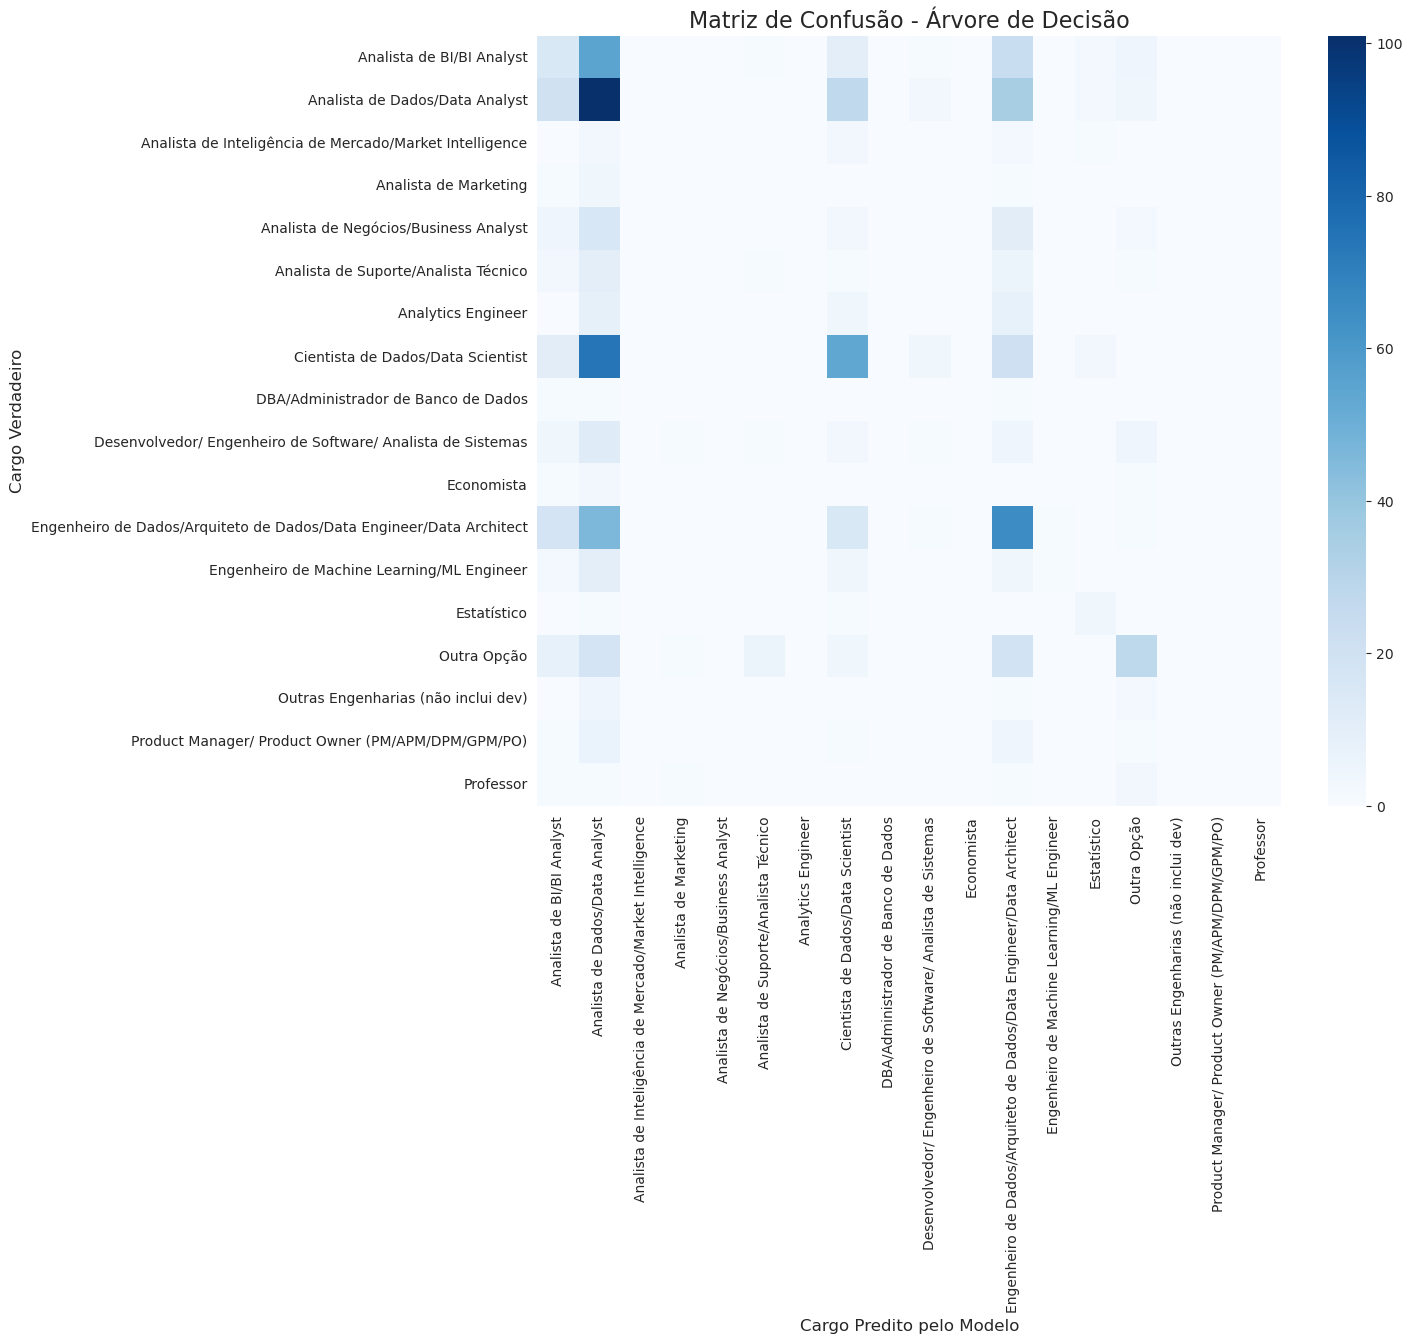


Gráfico da Matriz de Confusão salvo como 'matriz_confusao_arvore.png'


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import numpy as np

# --- Treinando e Avaliando: Árvore de Decisão ---

print("--- Modelo 1: Árvore de Decisão ---")

# 1. Definir o modelo com seus hiperparâmetros
# Justificativa:
# - random_state=42: Garante que o resultado seja sempre o mesmo ao rodar o código.
# - max_depth=10: Limita a profundidade para evitar que a árvore decore os dados (overfitting).
# - min_samples_leaf=5: Exige que cada decisão final na árvore seja baseada em pelo menos 5 amostras, tornando o modelo mais genérico.
modelo_arvore = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=5)

# 2. Criar a Pipeline
# A pipeline irá primeiro aplicar o pré-processamento (one-hot encoding) e depois treinar o modelo.
pipeline_arvore = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', modelo_arvore)
])

# 3. Treinar a pipeline com os dados de TREINO
print("Treinando o modelo de Árvore de Decisão...")
pipeline_arvore.fit(X_train, y_train)
print("Treinamento concluído!")

# 4. Fazer predições com os dados de TESTE
y_pred_arvore = pipeline_arvore.predict(X_test)

# 5. Avaliar o desempenho do modelo
# Acurácia: Das previsões feitas, quantas estavam certas?
accuracy = accuracy_score(y_test, y_pred_arvore)
# Precisão: Das vezes que o modelo previu um cargo X, quantas vezes ele acertou?
precision = precision_score(y_test, y_pred_arvore, average='weighted', zero_division=0)
# Recall: De todos os profissionais com cargo X, quantos o modelo conseguiu identificar corretamente?
recall = recall_score(y_test, y_pred_arvore, average='weighted', zero_division=0)

print("\n--- Métricas de Avaliação ---")
print(f"Acurácia: {accuracy:.4f} (ou {accuracy:.2%})")
print(f"Precisão (Ponderada): {precision:.4f}")
print(f"Recall (Ponderado): {recall:.4f}")

# 6. Gerar a Matriz de Confusão
# É uma tabela que mostra os acertos e erros do modelo de forma detalhada.
cm = confusion_matrix(y_test, y_pred_arvore)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusão - Árvore de Decisão', fontsize=16)
plt.ylabel('Cargo Verdadeiro', fontsize=12)
plt.xlabel('Cargo Predito pelo Modelo', fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
# Salva a imagem na pasta raiz do projeto
# plt.savefig('../docs/figures/matriz_confusao_arvore.png', bbox_inches='tight')
plt.show()

print("\nGráfico da Matriz de Confusão salvo como 'matriz_confusao_arvore.png'")


--- Modelo 2: Rede Neural (MLP) ---
Treinando o modelo de Rede Neural... (Isso pode demorar um pouco mais)
Treinamento concluído!

--- Métricas de Avaliação ---
Acurácia: 0.2134 (ou 21.34%)
Precisão (Ponderada): 0.2215
Recall (Ponderado): 0.2134


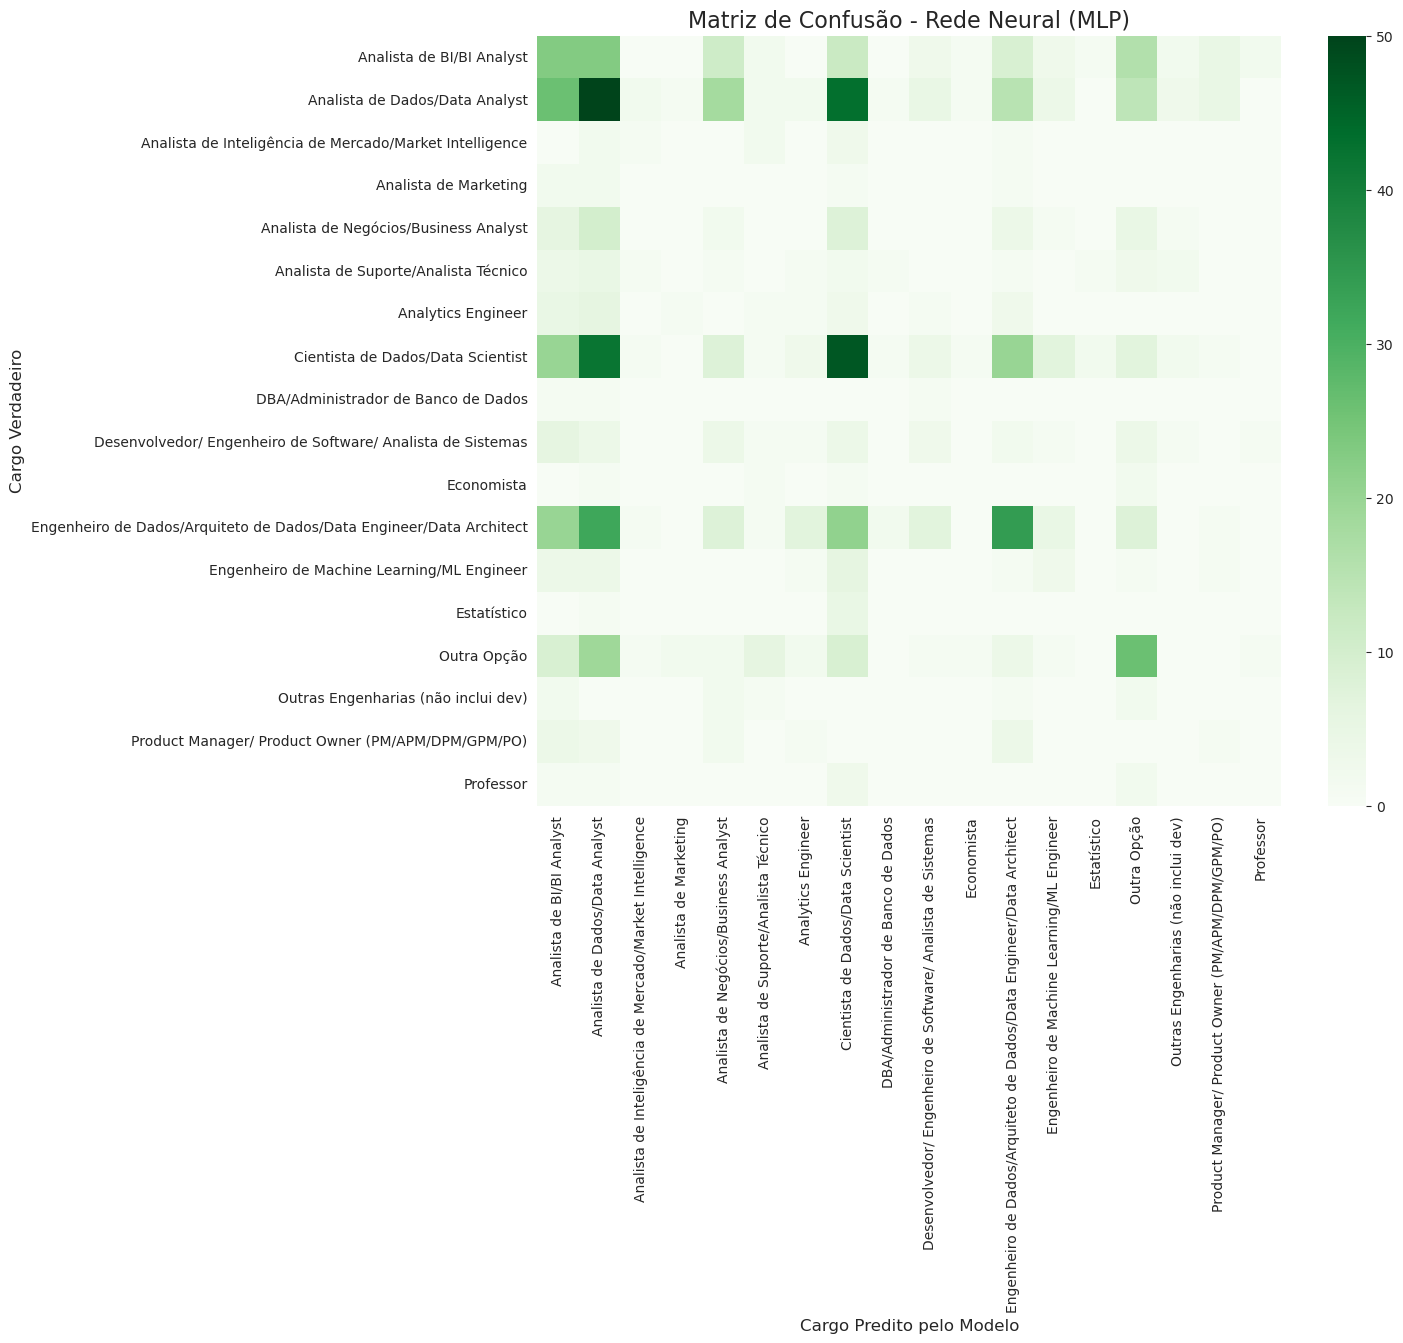


Gráfico da Matriz de Confusão salvo como 'matriz_confusao_rede.png'


In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# --- Treinando e Avaliando: Rede Neural (MLP) ---

print("\n--- Modelo 2: Rede Neural (MLP) ---")

# 1. Definir o modelo com seus hiperparâmetros
# Justificativa:
# - hidden_layer_sizes=(100, 50): Duas camadas ocultas. Uma arquitetura robusta para começar.
# - max_iter=300: Aumenta o número de épocas de treino para dar chance ao modelo de convergir.
# - activation='relu': Função de ativação mais comum e eficiente.
# - solver='adam': Otimizador moderno que ajusta a taxa de aprendizado.
# - random_state=42: Para reprodutibilidade.
modelo_rede = MLPClassifier(random_state=42, max_iter=300, hidden_layer_sizes=(100, 50))

# 2. Criar a nova Pipeline com 3 passos: pré-processamento, escalonamento e classificação
pipeline_rede = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)), # with_mean=False é necessário para os dados do OneHotEncoder
    ('classifier', modelo_rede)
])

# 3. Treinar a pipeline com os dados de TREINO
print("Treinando o modelo de Rede Neural... (Isso pode demorar um pouco mais)")
pipeline_rede.fit(X_train, y_train)
print("Treinamento concluído!")

# 4. Fazer predições com os dados de TESTE
y_pred_rede = pipeline_rede.predict(X_test)

# 5. Avaliar o desempenho do modelo
accuracy_r = accuracy_score(y_test, y_pred_rede)
precision_r = precision_score(y_test, y_pred_rede, average='weighted', zero_division=0)
recall_r = recall_score(y_test, y_pred_rede, average='weighted', zero_division=0)

print("\n--- Métricas de Avaliação ---")
print(f"Acurácia: {accuracy_r:.4f} (ou {accuracy_r:.2%})")
print(f"Precisão (Ponderada): {precision_r:.4f}")
print(f"Recall (Ponderado): {recall_r:.4f}")

# 6. Gerar a Matriz de Confusão
cm_r = confusion_matrix(y_test, y_pred_rede)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_r, annot=False, cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusão - Rede Neural (MLP)', fontsize=16)
plt.ylabel('Cargo Verdadeiro', fontsize=12)
plt.xlabel('Cargo Predito pelo Modelo', fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
# Salva a imagem na pasta raiz do projeto
# plt.savefig('../docs/figures/matriz_confusao_rede.png', bbox_inches='tight')
plt.show()

print("\nGráfico da Matriz de Confusão salvo como 'matriz_confusao_rede.png'")

In [10]:
import joblib

# --- Salvando o modelo final para a API ---

# 1. Salvar o pipeline da Árvore de Decisão, que teve o melhor desempenho
# Este arquivo contém toda a lógica de pré-processamento e o modelo treinado.
joblib.dump(pipeline_arvore, 'models/modelo_cargo_pipeline.joblib')

# 2. Salvar também o LabelEncoder
# Este arquivo é essencial para traduzir a previsão numérica do modelo (ex: 2)
# de volta para o nome do cargo em texto (ex: 'Cientista de Dados/Data Scientist').
joblib.dump(label_encoder, 'models/label_encoder_cargo.joblib')

print("Pipeline do modelo final e LabelEncoder salvos com sucesso na pasta ml_models")

Pipeline do modelo final e LabelEncoder salvos com sucesso na pasta ml_models
